# 17. Classification

Key content: k nearest neighbour method of classification

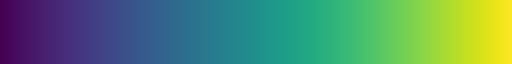

In [22]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries for regression

import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

# Set style for seaborn plots

sns.set_style('dark')
sns.color_palette("viridis", as_cmap=True)

In [4]:
banknote = pd.read_csv('banknote.csv')
banknote = banknote.rename(columns={
    'WaveletVar': 'var',
    'WaveletSkew': 'skew',
    'WaveletCurt': 'curt',
    'Entropy': 'entropy',
    'Class': 'class'
})
banknote.head(1)

,var,skew,curt,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0


Let’s look at whether the first two numbers tell us anything about whether the banknote is counterfeit or not. Here’s a scatterplot:

<Axes: xlabel='var', ylabel='curt'>

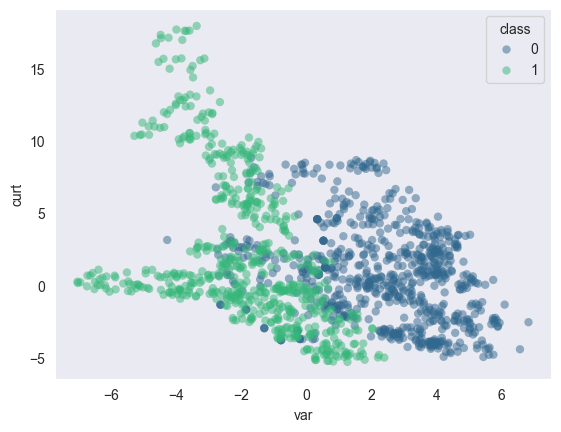

In [23]:
sns.scatterplot(data = banknote,
    x = 'var',
    y = 'curt',
    hue = 'class',
    palette = 'viridis',
    alpha = 0.5,
    edgecolor = 'none'
    )

Let’s see what happens if we try to predict whether a banknote is counterfeit or not using 3 of the measurements, instead of just 2.

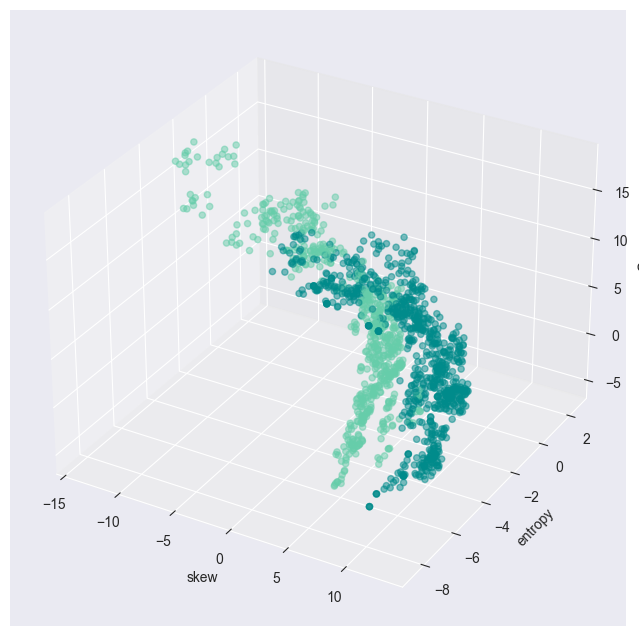

In [75]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set(xlabel='skew', ylabel='entropy', zlabel='curt')

scatter = ax.scatter(banknote['skew'], 
                     banknote['entropy'], 
                     banknote['curt'], 
                     c=np.where(banknote['class'] == 1, 'MediumAquamarine', 'DarkCyan'),
                     cmap='viridis', 
                     alpha=0.5)

The table wine contains the chemical composition of 178 different Italian wines. The classes are the grape species, called cultivars.

In [82]:
wine = pd.read_csv('wine.csv')
wine = wine.rename(columns={
    'Class': 'class',
    'Alcohol': 'alcohol',
    'Malic Acid': 'malic',
    'Ash': 'ash',
    'Alcalinity of Ash': 'alcalinity',
    'Magnesium': 'magnesium',
    'Total Phenols': 'total_phenols',
    'Flavanoids': 'flavanoids',
    'Nonflavanoid phenols': 'nonflavanoid_phenols',
    'Proanthocyanins': 'proanthocyanins',
    'Color Intensity': 'color_intensity',
    'Hue': 'hue',
    'OD280/OD315 of diulted wines': 'od280_od315',
    'Proline': 'proline'
})
wine


,class,alcohol,malic,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [81]:
wine['class'].unique()

array([1, 2, 3], dtype=int64)

There are 3 classes 1 -> 3, we're gonna group class 2 and 3 into class 0. We wanna see if class 1 is different from the rest.

In [84]:
wine['class'] = wine['class'].apply(lambda x: 1 if x == 1 else 0)
wine

,class,alcohol,malic,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,0,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,0,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,0,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Now let's create a table with just the attributes.

In [89]:
wine_attributes = wine.drop('class', axis = 1)
wine_attributes.head(1)

,alcohol,malic,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


Say we wanna find the distance between the first 2 rows/wines:

In [95]:
def distance(point1, point2):
	"""Compute the distance between point1 and point2 where each argument is an array consisting of the coordinates of the point"""
	return np.sqrt(np.sum((point1 - point2)**2))
				
distance(wine_attributes.loc[0], wine_attributes.loc[1])

31.265012394048398

In [96]:
distance(wine_attributes.loc[0], wine_attributes.loc[177])

506.05936766351834

That’s quite a bit bigger! Let’s do some visualization to see if Class 1 really looks different from Class 0 (in terms of certain pairs of attributes)

<Axes: title={'center': 'Flavanoids vs. Alcohol'}, xlabel='alcohol', ylabel='flavanoids'>

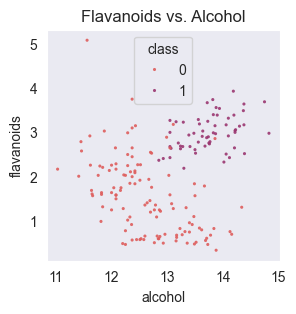

In [118]:
plt.figure(figsize=(3, 3))
plt.title('Flavanoids vs. Alcohol')
sns.scatterplot(data=wine,
                x='alcohol',
                y='flavanoids',
                hue='class',
                palette='flare',
                linewidth=0,
                alpha=0.9,
                s=5)

<Axes: title={'center': 'Alcalinity of Ash vs. Ash'}, xlabel='alcalinity', ylabel='ash'>

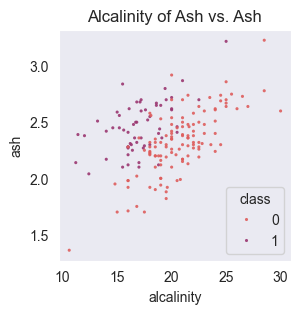

In [120]:
plt.figure(figsize=(3, 3))
plt.title('Alcalinity of Ash vs. Ash')
sns.scatterplot(data = wine,
                x = 'alcalinity',
                y = 'ash',
                hue = 'class',
                palette = 'flare',
                linewidth = 0,
                alpha = 0.9,
                s = 5)

<Axes: title={'center': 'Magnesium vs. Total Phenols'}, xlabel='magnesium', ylabel='total_phenols'>

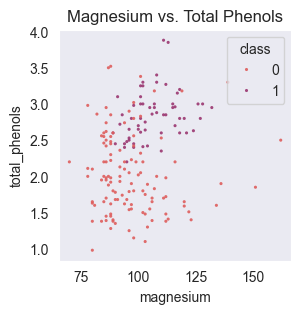

In [121]:
plt.figure(figsize=(3, 3))
plt.title('Magnesium vs. Total Phenols')
sns.scatterplot(data = wine,
                x = 'magnesium',
                y = 'total_phenols',
                hue = 'class',
                palette = 'flare',
                linewidth = 0,
                alpha = 0.9,
                s = 5)

Let’s see if we can implement a classifier based on all of the attributes. After that, we’ll see how accurate it is.

**Plan**:

Input = point that we wanna classify

Mechanism: finds k nearest neighbours from training set, i.e. k wines most similar to point -> find majority class as predicted class.

def closest(training, p, k):
    ...

def majority(topkclasses):
    ...

def classify(training, p, k):
    kclosest = closest(training, p, k)
    kclosest.classes = kclosest.select('Class')
    return majority(kclosest)

In [3]:
# 1. closest - calc dist then sort ascending then pick the top k
# from above
def distance(point1, point2):
	"""Compute the distance between point1 and point2 where each argument is an array consisting of the coordinates of the point"""
	return np.sqrt(np.sum((point1 - point2)**2))
				
# We need a function that takes a training pt and compare it with ALL points in the data set, not just with 1 row of training data. Return distance -> add as new column.
def distance_all(training_data, newpoint):
    training_data['distance'] = training_data.apply(lambda row: distance(row, newpoint), axis=1)
    return training_data.sort_values(by='distance').head(5)

distance_all(wine, wine.loc[177])

NameError: name 'wine' is not defined

In [169]:
# 2. majority's class: extract k closest -> return class
def majority_class(training_data, newpoint):
    k = int(input("Enter k:"))
    distance_all_table = distance_all(training_data, newpoint)
    smallest_dist = distance_all_table.nsmallest(k, 'distance')
    majority_class = smallest_dist['class'].mode()[0]

    display(smallest_dist)
    return print(f'The majority class, and thus the class of the new data point, is: {majority_class}.')

majority_class(wine, wine.loc[0])

,class,alcohol,malic,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,distance
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.000000
54,1,13.74,1.67,2.25,16.4,118,2.6,2.90,0.21,1.62,5.85,0.92,3.20,1060,22.637861


The majority class, and thus the class of the new data point, is: 1.


In [168]:
# Test using the final data point.
# Rmb results within the training set should be 100% accurate.

majority_class(wine, wine.iloc[177])

,class,alcohol,malic,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,distance
177,0,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,0.000000
132,0,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560,8.730856
87,0,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562,21.603052
143,0,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550,22.147483
101,0,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562,24.105082


The majority class, and thus the class of the new data point, is: 0.


To see how well our classifier does, we might put 50% of the data into the training set and the other 50% into the test set. Basically, we are setting aside some data for later use, so we can use it to measure the accuracy of our classifier. We’ve been calling that the **test set**. Sometimes people will call the data that you set aside for testing a **hold-out set**, and they’ll call this strategy for estimating accuracy the **hold-out method**.

The data set has 178 wines, so we’ll randomly permute the data set and put 89 of them in the training set and the remaining 89 in the test set.

REMEMBER:
If you're shuffling parts of your training data during training, it's more akin to a **validation** set rather than a traditional holdout set. A holdout set is usually set aside at the beginning and remains untouched during the model development and tuning process. It's only used at the end to assess the final model's performance on unseen data.

BUT! We'll be training the model on only half of the data so it is a holdout method.

1. Find the middle index using len(data) // 2

2. .iloc[:split_index] = from beginning to that half way pt

[split_index:] = from half way pt to the end

In [250]:
wine_shuffled = wine.sample(frac = 1, replace = False)
split_index = len(wine_shuffled) // 2
split_index

89

In [251]:
training_set = wine_shuffled.iloc[:split_index]
test_set = wine_shuffled.iloc[split_index:]
test_set.head(1)

,class,alcohol,malic,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,distance
86,0,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495,1084.057217


IMPORTANT: Why are we sampling withOUT replacement?

=> In the context of creating a holdout set for evaluation, you typically want the sets to be non-overlapping, and each data point should be in either the training set or the test set but not both. 

We’ll train the classifier using the 89 wines in the training set, and evaluate how well it performs on the test set. To make our lives easier, we’ll write a function to evaluate a classifier on every wine in the test set:

In [1]:
# X work since we're expecting a row of test_set
majority_class(training_set, test_set)


NameError: name 'majority_class' is not defined

In [252]:
# similar to majority class but X output results, we just need the single class output
def determine_class(training_data, newpoint, k):
    distance_all_table = distance_all(training_data, newpoint)
    smallest_dist = distance_all_table.nsmallest(k, 'distance')
    majority_class = smallest_dist['class'].mode()[0]
    return majority_class

# 2. majority's class: extract k closest -> return class
def testing(training_data, test_data, k):
    # task: turn that newpoint from determine_class into every row of the testset
    test_data['prediction'] = test_data.apply(lambda row: determine_class(training_data, row, k), axis=1)
    # we append the class result to all rows of test_set
    return test_data.head(1)

# Example usage:
k_value = int(input("Enter k: "))
testing(training_set, test_set, k_value)

,class,alcohol,malic,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,distance,prediction
86,0,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495,1084.057217,0


apply(lambda row(oranything): function(arguments), axis = 1)

WIHTOUT lambda, the axis =1 is gonna be interpreted as an argument to the function -> error

In [254]:
def evaluate(test_data):
    # find correct score
    correct = (test_data['prediction'] == test_data['class']).sum()
    # find % accuracy
    accuracy = correct / len(test_data)
    return accuracy

evaluate(test_set)

0.7865168539325843